# Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.style.use("fast")
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import random
import statistics

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset encoded but not scaled.

In [ ]:
datasetPath = '/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/dm1_df_understanding_NOTSCALED.csv'
data = pd.read_csv(datasetPath)

data.head(3)

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_bars,processing,genre,duration_min
0,0,0,46,0,0,0.690,0.513,5,-12.529,1,0.0975,0.302000,0.536,0.281,0.6350,142.221,141.0,1.279305,0,4.029333
1,1,0,0,1,1,0.069,0.196,1,-24.801,0,0.0805,0.283000,0.934,0.360,0.0336,75.596,155.0,2.367412,1,7.400000
2,2,0,3,2,2,0.363,0.854,2,-7.445,0,0.0397,0.000089,0.800,0.262,0.4890,116.628,162.0,3.700483,2,5.558433


In order to easily map object variables to the integers with which they were replaced (we are talking about `name`, `artists`, `album_name`, and `genre`), we decided to save to disk a dictionary of dictionaries, containing each integer associated with the original string. This way we can see what `genre` each integer in the genre column is associated with.

In [ ]:
import pickle

# Carica il dizionario inverso da disco
with open('/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/inverse_column_dicts.pkl', 'rb') as f:
    loaded_inverse_column_dicts = pickle.load(f)

genre_dict = loaded_inverse_column_dicts['genre']
genre_dict

{0: 'j-dance',
 1: 'iranian',
 2: 'black-metal',
 3: 'bluegrass',
 4: 'happy',
 5: 'industrial',
 6: 'j-idol',
 7: 'spanish',
 8: 'sleep',
 9: 'techno',
 10: 'mandopop',
 11: 'afrobeat',
 12: 'disney',
 13: 'study',
 14: 'indian',
 15: 'idm',
 16: 'forro',
 17: 'chicago-house',
 18: 'brazil',
 19: 'breakbeat'}

In [ ]:
df = data.copy(deep=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  int64  
 1   explicit          15000 non-null  int64  
 2   popularity        15000 non-null  int64  
 3   artists           15000 non-null  int64  
 4   album_name        15000 non-null  int64  
 5   danceability      15000 non-null  float64
 6   energy            15000 non-null  float64
 7   key               15000 non-null  int64  
 8   loudness          15000 non-null  float64
 9   mode              15000 non-null  int64  
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  n_bars            15000 non-null  float6

In [ ]:
df.drop(['name','artists', 'album_name'], axis=1, inplace=True)

In [ ]:
# One-Hot Encoding 'key'
df = pd.get_dummies(df, columns=['key'])

In [ ]:
df.head()

,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0,46,0.690,0.513,-12.529,1,0.0975,0.302000,0.53600,0.281,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0.069,0.196,-24.801,0,0.0805,0.283000,0.93400,0.360,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0.363,0.854,-7.445,0,0.0397,0.000089,0.80000,0.262,...,1,0,0,0,0,0,0,0,0,0
3,0,23,0.523,0.585,-5.607,1,0.0765,0.066400,0.00127,0.117,...,0,0,0,1,0,0,0,0,0,0
4,0,25,0.643,0.687,-11.340,1,0.0539,0.000576,0.09690,0.299,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(15000, 28)

In [ ]:
# sns.countplot(data=df, x=df['genre'])

### TEST SET

In [ ]:
testSetPath = '/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/test.csv'
test_df = pd.read_csv(testSetPath)

test_df.head(3)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,...,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,...,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,...,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558,indian


In [ ]:
# Pre-Processing
test_df.drop(['name','artists', 'album_name','time_signature','popularity_confidence','features_duration_ms','n_beats'], axis=1, inplace=True)
test_df['duration_min'] = test_df['duration_ms'] / 60000
test_df.drop('duration_ms', axis=1, inplace=True)
test_df['explicit'] = [int(x) for x in test_df['explicit']] # bool->int (binary)
test_df['key'] = [int(x) for x in test_df['key']] # float -> int

data_modeNoNull = test_df.dropna(subset=['mode'], axis=0)
mode_1_records = test_df[test_df['mode'] == 1].shape[0]
mode_0_records = test_df[test_df['mode'] == 0].shape[0]
percent_1 = mode_1_records / data_modeNoNull.shape[0]
percent_0 = mode_0_records / data_modeNoNull.shape[0]
null_count_mode = test_df['mode'].isnull().sum()
count_1 = int(null_count_mode * (percent_1 / 100))
count_0 = null_count_mode - count_1
random_values = np.random.choice([1, 0], size=null_count_mode, p=[percent_1, percent_0])
test_df.loc[test_df['mode'].isnull(), 'mode'] = random_values
test_df['mode'] = [int(x) for x in test_df['mode']] # float->int (binary)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          5000 non-null   int64  
 1   popularity        5000 non-null   int64  
 2   danceability      5000 non-null   float64
 3   energy            5000 non-null   float64
 4   key               5000 non-null   int64  
 5   loudness          5000 non-null   float64
 6   mode              5000 non-null   int64  
 7   speechiness       5000 non-null   float64
 8   acousticness      5000 non-null   float64
 9   instrumentalness  5000 non-null   float64
 10  liveness          5000 non-null   float64
 11  valence           5000 non-null   float64
 12  tempo             5000 non-null   float64
 13  n_bars            5000 non-null   float64
 14  processing        5000 non-null   float64
 15  genre             5000 non-null   object 
 16  duration_min      5000 non-null   float64


In [ ]:
# Ottieni i generi nel training set
train_genres = set(genre_dict.values())

# Ottieni i generi unici nel test set
test_genres = set(test_df['genre'].unique())

# Confronta i generi
common_genres = train_genres.intersection(test_genres)
train_only_genres = train_genres.difference(test_genres)
test_only_genres = test_genres.difference(train_genres)

print("Generi comuni:", common_genres)
print("Generi solo nel training set:", train_only_genres)
print("Generi solo nel test set:", test_only_genres)

Generi comuni: {'breakbeat', 'techno', 'happy', 'brazil', 'indian', 'black-metal', 'idm', 'bluegrass', 'study', 'afrobeat', 'j-idol', 'iranian', 'chicago-house', 'industrial', 'mandopop', 'forro', 'sleep', 'spanish', 'j-dance', 'disney'}
Generi solo nel training set: set()
Generi solo nel test set: set()


In [ ]:
# Inverti il dizionario
genre_dict_test = {v: k for k, v in genre_dict.items()}
# Ora mappa i generi del test set agli interi corrispondenti
test_df['genre'] = test_df['genre'].map(genre_dict_test)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['key'])
print(test_df.shape, df.shape)
test_df.head()

(5000, 28) (15000, 28)


,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0,32,0.383,0.951,-3.743,1,0.1040,0.00607,0.000000,0.2610,...,0,0,0,0,0,0,0,0,0,0
1,0,41,0.464,0.579,-9.136,1,0.0596,0.28100,0.827000,0.0992,...,0,0,0,1,0,0,0,0,0,0
2,0,40,0.611,0.778,-4.803,1,0.0326,0.09460,0.000005,0.1390,...,0,0,0,0,0,0,0,1,0,0
3,0,25,0.500,0.958,-1.695,0,0.0350,0.00817,0.318000,0.7320,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.802,0.684,-8.839,1,0.1230,0.00181,0.010200,0.2360,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          15000 non-null  int64  
 1   popularity        15000 non-null  int64  
 2   danceability      15000 non-null  float64
 3   energy            15000 non-null  float64
 4   loudness          15000 non-null  float64
 5   mode              15000 non-null  int64  
 6   speechiness       15000 non-null  float64
 7   acousticness      15000 non-null  float64
 8   instrumentalness  15000 non-null  float64
 9   liveness          15000 non-null  float64
 10  valence           15000 non-null  float64
 11  tempo             15000 non-null  float64
 12  n_bars            15000 non-null  float64
 13  processing        15000 non-null  float64
 14  genre             15000 non-null  int64  
 15  duration_min      15000 non-null  float64
 16  key_0             15000 non-null  uint8 

# REGRESSION

## Simple

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
df_continuous = df.copy(deep=True)
df_continuous = df_continuous[[
    'popularity', 'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'n_bars', 'duration_min'
]]

In [ ]:
df_train, df_test = train_test_split(df_continuous, test_size=0.3, random_state=100)

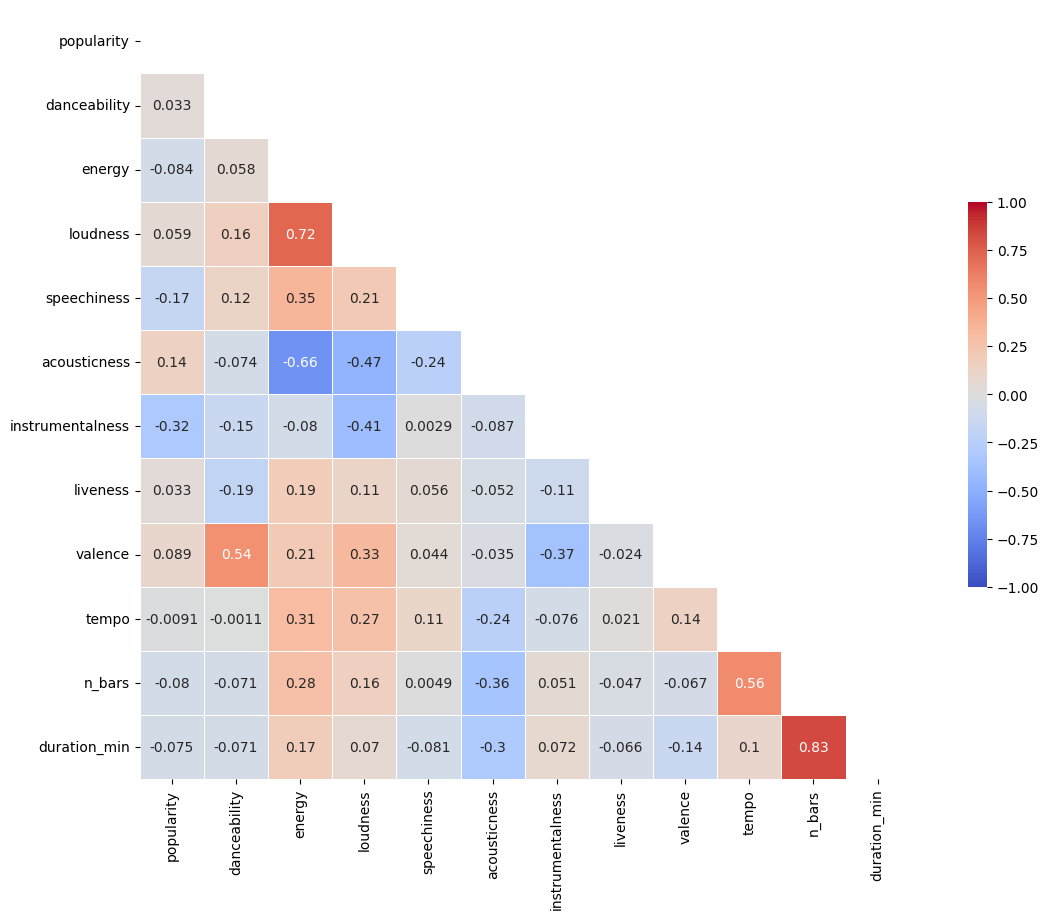

In [ ]:
# Calcola la correlazione di Spearman
corr_spearman = df_continuous.corr(method='spearman')

# Crea una maschera per la parte superiore del triangolo
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Imposta le dimensioni della figura
plt.figure(figsize=(15, 10))

# Genera una heatmap personalizzata
sns.heatmap(corr_spearman, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Mostra la figura
plt.show()

In [ ]:
def simple_regression_results(regressor, train, test, x, y):
  model = regressor()
  x_train = df_train[x].values.reshape(-1, 1)
  y_train = df_train[y].values

  x_test = df_test[x].values.reshape(-1, 1)
  y_test = df_test[y].values

  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  # Return a dictionary of the results
  return {
      'Model': model,
      'Coefficients': round(model.coef_[0], 2),
      'Intercept': round(model.intercept_, 2),
      'R2': round(r2_score(y_test, y_pred), 2),
      'MSE': round(mean_squared_error(y_test, y_pred), 2),
      'MAE': round(mean_absolute_error(y_test, y_pred), 2)
  }

def simple_regression_plot(model, train, test, best_couple):
  x, y = best_couple[0], best_couple[1]

  x_train = train[x].values.reshape(-1, 1)
  y_train = train[y].values

  x_test = test[x].values.reshape(-1, 1)
  y_test = test[y].values

  fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
  fig.suptitle(f'Train/Test Regression Plots \n {x} vs {y}')

  axs[0].scatter(x_train, y_train)
  axs[0].plot(x_train, model.coef_[0]*x_train+model.intercept_, c="red")
  axs[0].set_xlabel(x)
  axs[0].set_ylabel(y)
  axs[0].set_title('TRAIN')

  y_pred = model.predict(x_test)

  axs[1].scatter(x_test, y_test)
  axs[1].plot(x_test, model.coef_[0]*x_test+model.intercept_, c="red")
  axs[1].set_xlabel(x)
  axs[1].set_ylabel(y)
  axs[1].set_title('TEST')

  plt.show()

### Linear

In [ ]:
# Trova le coppie di feature con la correlazione più alta (positiva o negativa)
pairs = corr_spearman.unstack().sort_values(ascending=False, key=abs)

# Rimuovi le correlazioni duplicate e la correlazione di una feature con se stessa
pairs = pairs[pairs != 1][::2]

# Rimuovi le coppie con correlazioni comprese tra -0.4 e 0.4
pairs = pairs[(pairs > 0.4) | (pairs < -0.4)]

# Stampa le coppie di feature con la correlazione più alta
print(pairs)

duration_min  n_bars              0.832873
loudness      energy              0.721253
acousticness  energy             -0.660646
n_bars        tempo               0.563013
danceability  valence             0.540504
loudness      acousticness       -0.472642
              instrumentalness   -0.406914
dtype: float64


In [ ]:
results_linear = []

for pair in pairs.index:
    x, y = pair
    result = simple_regression_results(LinearRegression, df_train, df_test, x, y)
    corr_xy = pairs[pair]
    results_linear.append({'x': x, 'y': y, 'Corr': corr_xy, **result})

results_linear = pd.DataFrame(results_linear)
results_linear

,x,y,Corr,Model,Coefficients,Intercept,R2,MSE,MAE
0,duration_min,n_bars,0.832873,LinearRegression(),27.97,13.07,0.76,1387.72,25.64
1,loudness,energy,0.721253,LinearRegression(),0.03,0.94,0.51,0.03,0.15
2,acousticness,energy,-0.660646,LinearRegression(),-0.56,0.83,0.49,0.04,0.15
3,n_bars,tempo,0.563013,LinearRegression(),0.19,99.27,0.19,817.40,22.37
4,danceability,valence,0.540504,LinearRegression(),0.79,-0.00,0.32,0.05,0.19
5,loudness,acousticness,-0.472642,LinearRegression(),-0.03,0.04,0.30,0.08,0.23
6,loudness,instrumentalness,-0.406914,LinearRegression(),-0.03,0.03,0.20,0.12,0.29


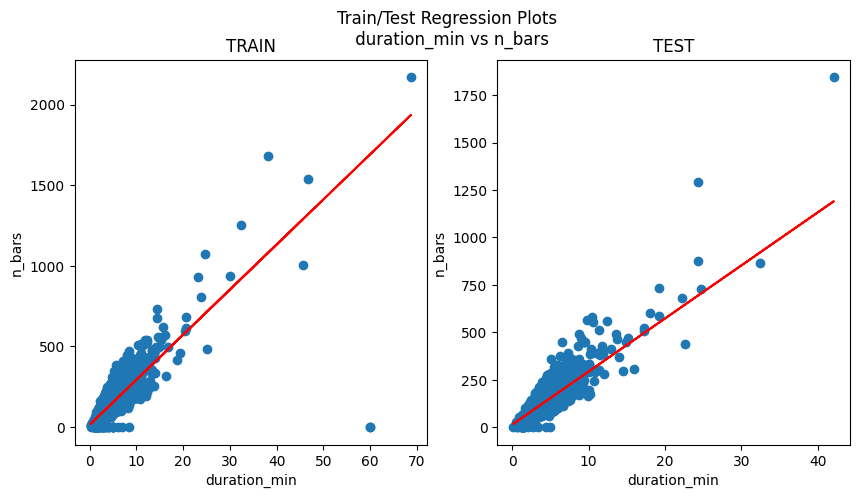

In [ ]:
best_couple = results_linear.loc[results_linear['R2'].idxmax()]
best_model = best_couple['Model']
simple_regression_plot(best_model, df_train, df_test, best_couple)

Based on the R2 scores, which is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model:

- The **best** performing model is the one between `duration_min` and `n_bars`, with an R2 score of 0.76. This indicates that 76% of the variation in `n_bars` can be explained by `duration_min`. This model has the highest R2 score, suggesting a strong positive linear relationship between these two features. This confirms what we expected, because the length of the track increases as the number of bars it contains increases.

- The **worst** performing model is the one between `n_bars` and `tempo`, with an R2 score of 0.19. This indicates that only 19% of the variation in `n_bars` can be explained by `tempo`. This model has the lowest R2 score, suggesting a weaker linear relationship between these two features. In fact, the number of bars in a track does not significantly influence its tempo, at least not in a linear manner. Tempo and the number of bars in a track are largely independent musical elements, knowing the number of bars in a track doesn’t provide much information about its tempo. The tempo of a track is often chosen based on the mood or style of the music, while the number of bars is typically determined by the structure and length of the song.

##### Ridge

In [ ]:
results_ridge = []

for pair in pairs.index:
    x, y = pair
    result = simple_regression_results(Ridge, df_train, df_test, x, y)
    corr_xy = pairs[pair]
    results_ridge.append({'x': x, 'y': y, 'Corr': corr_xy, **result})

results_ridge = pd.DataFrame(results_ridge)
results_ridge

,x,y,Corr,Model,Coefficients,Intercept,R2,MSE,MAE
0,duration_min,n_bars,0.832873,Ridge(),27.97,13.07,0.76,1387.75,25.64
1,loudness,energy,0.721253,Ridge(),0.03,0.94,0.51,0.03,0.15
2,acousticness,energy,-0.660646,Ridge(),-0.56,0.83,0.49,0.04,0.15
3,n_bars,tempo,0.563013,Ridge(),0.19,99.27,0.19,817.40,22.37
4,danceability,valence,0.540504,Ridge(),0.79,0.00,0.32,0.05,0.19
5,loudness,acousticness,-0.472642,Ridge(),-0.03,0.04,0.30,0.08,0.23
6,loudness,instrumentalness,-0.406914,Ridge(),-0.03,0.03,0.20,0.12,0.29


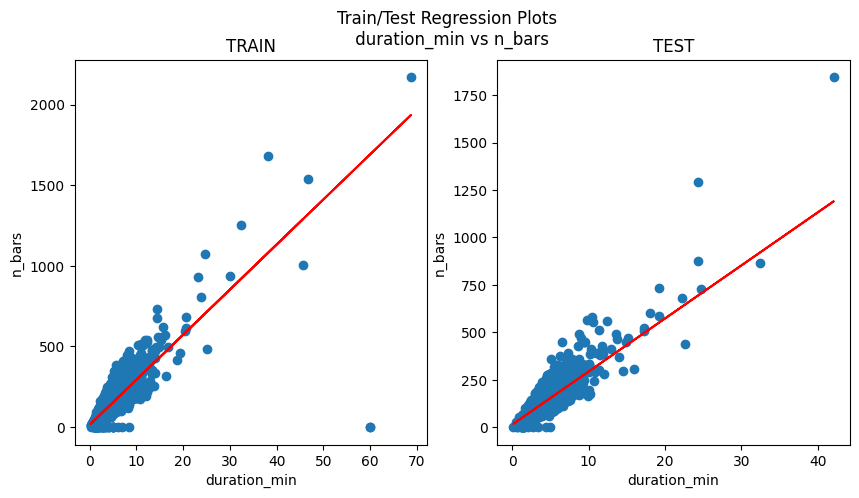

In [ ]:
best_couple = results_ridge.loc[results_ridge['R2'].idxmax()]
best_model = best_couple['Model']
simple_regression_plot(best_model, df_train, df_test, best_couple)

##### Lasso

In [ ]:
results_lasso = []

for pair in pairs.index:
    x, y = pair
    result = simple_regression_results(Lasso, df_train, df_test, x, y)
    corr_xy = pairs[pair]
    results_lasso.append({'x': x, 'y': y, 'Corr': corr_xy, **result})

results_lasso = pd.DataFrame(results_lasso)
results_lasso

,x,y,Corr,Model,Coefficients,Intercept,R2,MSE,MAE
0,duration_min,n_bars,0.832873,Lasso(),27.77,13.92,0.76,1397.61,25.74
1,loudness,energy,0.721253,Lasso(),0.00,0.69,0.13,0.06,0.21
2,acousticness,energy,-0.660646,Lasso(),-0.00,0.65,-0.00,0.07,0.22
3,n_bars,tempo,0.563013,Lasso(),0.19,99.30,0.19,817.38,22.37
4,danceability,valence,0.540504,Lasso(),0.00,0.44,-0.00,0.08,0.24
5,loudness,acousticness,-0.472642,Lasso(),-0.00,0.28,0.05,0.10,0.28
6,loudness,instrumentalness,-0.406914,Lasso(),-0.00,0.28,0.01,0.14,0.35


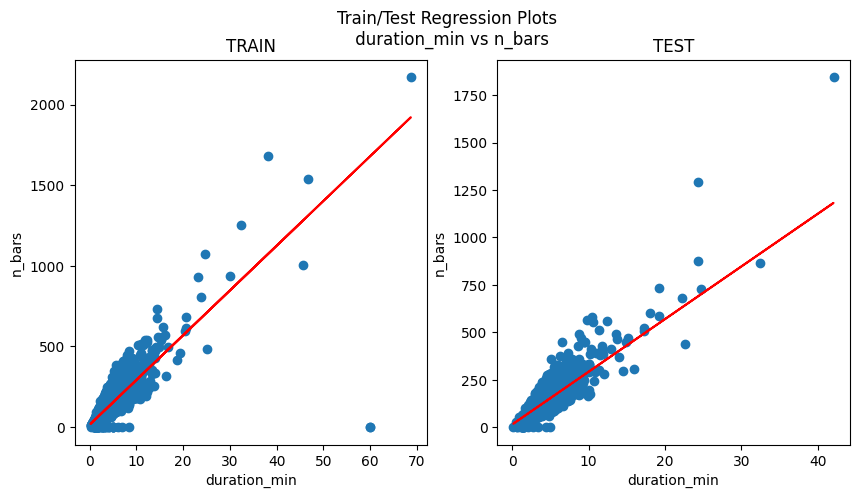

In [ ]:
best_couple = results_lasso.loc[results_lasso['R2'].idxmax()]
best_model = best_couple['Model']
simple_regression_plot(best_model, df_train, df_test, best_couple)

### NonLinear

In [ ]:
def nl_simple_regression_results(regressor, train, test, x, y):
  model = regressor()
  x_train = train[x].values.reshape(-1, 1)
  y_train = train[y].values

  x_test = test[x].values.reshape(-1, 1)
  y_test = test[y].values

  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  # Return a dictionary of the results
  return {
      'Model': model,
      'R2': round(r2_score(y_test, y_pred), 2),
      'MSE': round(mean_squared_error(y_test, y_pred), 2),
      'MAE': round(mean_absolute_error(y_test, y_pred), 2)
  }

def nl_simple_regression_plot(model, train, test, best_couple):
  x, y = best_couple[0], best_couple[1]

  x_train = train[x].values.reshape(-1, 1)
  y_train = train[y].values

  x_test = test[x].values.reshape(-1, 1)
  y_test = test[y].values

  # Fit the model
  model.fit(x_train, y_train)

  # Predict the values
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  # Plot true vs predicted values
  sns.scatterplot(x=x, y=y_test, label="True")
  sns.scatterplot(x=x, y=y_pred_test, label="Predicted", marker="X")
  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.legend()

  plt.show()

#### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Assume df_train and df_test are your dataframes
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(df_train)

# Apply transform to both the training set and the test set.
df_train_knn, df_test_knn = df_train.copy(deep=True), df_test.copy(deep=True)
df_train_knn = pd.DataFrame(scaler.transform(df_train_knn), columns=df_train.columns)
df_test_knn = pd.DataFrame(scaler.transform(df_test_knn), columns=df_test.columns)

results_knn = []

for pair in pairs.index:
    x, y = pair
    result = nl_simple_regression_results(KNeighborsRegressor, df_train_knn, df_test_knn, x, y)
    corr_xy = pairs[pair]
    results_knn.append({'x': x, 'y': y, 'Corr': corr_xy, **result})

results_knn = pd.DataFrame(results_knn)
results_knn

,x,y,Corr,Model,R2,MSE,MAE
0,duration_min,n_bars,0.832873,KNeighborsRegressor(),0.73,0.28,0.37
1,loudness,energy,0.721253,KNeighborsRegressor(),0.49,0.50,0.54
2,acousticness,energy,-0.660646,KNeighborsRegressor(),0.42,0.57,0.59
3,n_bars,tempo,0.563013,KNeighborsRegressor(),0.26,0.72,0.68
4,danceability,valence,0.540504,KNeighborsRegressor(),0.19,0.82,0.73
5,loudness,acousticness,-0.472642,KNeighborsRegressor(),0.19,0.82,0.72
6,loudness,instrumentalness,-0.406914,KNeighborsRegressor(),0.06,0.93,0.76


In [ ]:
'''best_couple = results_knn.loc[results_knn['R2'].idxmax()]
best_model = best_couple['Model']
nl_simple_regression_plot(best_model, df_train, df_test, best_couple)'''

"best_couple = results_knn.loc[results_knn['R2'].idxmax()]\nbest_model = best_couple['Model']\nnl_simple_regression_plot(best_model, df_train, df_test, best_couple)"

#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

results_dtr = []

for pair in pairs.index:
    x, y = pair
    result = nl_simple_regression_results(DecisionTreeRegressor, df_train, df_test, x, y)
    corr_xy = pairs[pair]
    results_dtr.append({'x': x, 'y': y, 'Corr': corr_xy, **result})

results_dtr = pd.DataFrame(results_dtr)
results_dtr

,x,y,Corr,Model,R2,MSE,MAE
0,duration_min,n_bars,0.832873,DecisionTreeRegressor(),0.57,2467.99,34.63
1,loudness,energy,0.721253,DecisionTreeRegressor(),0.23,0.05,0.17
2,acousticness,energy,-0.660646,DecisionTreeRegressor(),0.38,0.04,0.16
3,n_bars,tempo,0.563013,DecisionTreeRegressor(),0.34,668.11,20.28
4,danceability,valence,0.540504,DecisionTreeRegressor(),0.27,0.06,0.19
5,loudness,acousticness,-0.472642,DecisionTreeRegressor(),-0.23,0.13,0.27
6,loudness,instrumentalness,-0.406914,DecisionTreeRegressor(),-0.44,0.21,0.31


## Multiple

In [ ]:
df_continuous = df.copy(deep=True)
df_continuous = df_continuous[[
    'popularity', 'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'n_bars', 'duration_min'
]]

In [ ]:
# target = 'popularity'
# target = 'valence'
target = 'danceability'

df_train, df_test = train_test_split(df_continuous, test_size=0.3, random_state=100)

y_train = df_train[target].values
X_train = df_train.drop(target, axis=1)
X_train = X_train.values

y_test = df_test[target].values
X_test = df_test.drop(target, axis=1)
X_test = X_test.values

### Linear

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

# Define the models and parameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] }
}

# Perform GridSearch
for model_name in models:
    model = models[model_name]
    param = params[model_name]
    gs = GridSearchCV(model, param, cv=5)
    gs.fit(X_train, y_train)
    print()
    print(f"Best parameters for {model_name}: {gs.best_params_}")

    y_pred = gs.predict(X_test)
    print(f'R2 for {model_name}: %.3f' % r2_score(y_test, y_pred))
    print(f'MSE for {model_name}: %.3f' % mean_squared_error(y_test, y_pred))
    print(f'MAE for {model_name}: %.3f' % mean_absolute_error(y_test, y_pred))
    print()



Best parameters for LinearRegression: {}
R2 for LinearRegression: 0.404
MSE for LinearRegression: 0.023
MAE for LinearRegression: 0.120


Best parameters for Ridge: {'alpha': 1}
R2 for Ridge: 0.404
MSE for Ridge: 0.023
MAE for Ridge: 0.120


Best parameters for Lasso: {'alpha': 0.0001}
R2 for Lasso: 0.404
MSE for Lasso: 0.023
MAE for Lasso: 0.120



### NonLinear

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model and parameters
model = DecisionTreeRegressor()
params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Perform GridSearch
dtr = GridSearchCV(model, params, cv=5)
dtr.fit(X_train, y_train)

print(f"Best parameters: {dtr.best_params_}")

y_pred = dtr.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
R2: 0.526
MSE: 0.018
MAE: 0.102


### For each variable (continuous)

In [ ]:
#todo: prova a inserire anche categoriche tra le features
# todo: forse conviene scalare tutte le features anche per gli altri modelli oppure solo per knn?

In [ ]:
%%time
# 58min

target_variables = ['popularity', 'danceability', 'energy', 'loudness',
                    'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'n_bars', 'duration_min']

'''
# Define the models and parameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor()
}

params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
        }
}

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Target', 'Model', 'Best Parameters', 'R2', 'MSE', 'MAE'])

for target in tqdm(target_variables):
    df_train, df_test = train_test_split(df_continuous, test_size=0.3, random_state=0)

    y_train = df_train[target].values
    X_train = df_train.drop(target, axis=1)
    X_train = X_train.values

    y_test = df_test[target].values
    X_test = df_test.drop(target, axis=1)
    X_test = X_test.values

    # Perform GridSearch for LinearRegression, Ridge, Lasso and DecisionTree
    for model_name in models:
        model = models[model_name]
        param = params[model_name]
        gs = GridSearchCV(model, param, cv=5)
        gs.fit(X_train, y_train)

        y_pred = gs.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Append the results to the DataFrame
        # Append the results to the DataFrame using concat
        result = pd.DataFrame({'Target': [target], 'Model': [model_name],
                               'Best Parameters': [gs.best_params_], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
        results = pd.concat([results, result], ignore_index=True)

results'''

'''from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Add KNeighborsRegressor to your models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

# Add parameters for KNeighborsRegressor to your params
params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'KNN': {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Target', 'Model', 'Best Parameters', 'R2', 'MSE', 'MAE'])

for target in tqdm(target_variables):
  df_train, df_test = train_test_split(df_continuous, test_size=0.3, random_state=0)

  y_train = df_train[target].values
  X_train = df_train.drop(target, axis=1)
  X_train = X_train.values

  y_test = df_test[target].values
  X_test = df_test.drop(target, axis=1)
  X_test = X_test.values

  # Perform GridSearch for all models
  for model_name in models:
      model = models[model_name]
      param = params[model_name]

      # Scale data only for KNN
      if model_name in ['KNN', 'LinearRegression', 'Lasso', 'Ridge']:
          scaler = StandardScaler()
          X_train_scaled = scaler.fit_transform(X_train)
          X_test_scaled = scaler.transform(X_test)
      else:
          X_train_scaled = X_train
          X_test_scaled = X_test

      gs = GridSearchCV(model, param, cv=5)
      gs.fit(X_train_scaled, y_train)

      y_pred = gs.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      # Append the results to the DataFrame
      result = pd.DataFrame({'Target': [target], 'Model': [model_name],
                           'Best Parameters': [gs.best_params_], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
      results = pd.concat([results, result], ignore_index=True)

results'''



# ================ scaled data for all models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Add KNeighborsRegressor to your models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

# Add parameters for KNeighborsRegressor to your params
params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'KNN': {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Target', 'Model', 'Best Parameters', 'R2', 'MSE', 'MAE'])

for target in tqdm(target_variables):
  df_train, df_test = train_test_split(df_continuous, test_size=0.3, random_state=0)

  y_train = df_train[target].values
  X_train = df_train.drop(target, axis=1)
  X_train = X_train.values

  y_test = df_test[target].values
  X_test = df_test.drop(target, axis=1)
  X_test = X_test.values

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  #X_train_scaled = X_train
  #X_test_scaled = X_test

  # Perform GridSearch for all models
  for model_name in models:
      model = models[model_name]
      param = params[model_name]

      gs = GridSearchCV(model, param, cv=5)
      gs.fit(X_train_scaled, y_train)

      y_pred = gs.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      # Append the results to the DataFrame
      result = pd.DataFrame({'Target': [target], 'Model': [model_name],
                           'Best Parameters': [gs.best_params_], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
      results = pd.concat([results, result], ignore_index=True)

results.sort_values(by='R2', ascending=False)

  0%|          | 0/12 [00:00<?, ?it/s]

CPU times: user 58min 39s, sys: 11.3 s, total: 58min 50s
Wall time: 59min 13s


,Target,Model,Best Parameters,R2,MSE,MAE
53,n_bars,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.897477,523.716430,9.048613
48,tempo,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.862377,145.888914,7.471421
52,n_bars,Lasso,{'alpha': 0.1},0.793765,1053.504559,11.442729
51,n_bars,Ridge,{'alpha': 1},0.793519,1054.764934,11.452346
50,n_bars,LinearRegression,{},0.793504,1054.842681,11.451914
19,loudness,KNN,"{'metric': 'manhattan', 'n_neighbors': 13, 'we...",0.773010,8.658406,2.046117
14,energy,KNN,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.771866,0.015748,0.092521
54,n_bars,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.764384,1203.592494,17.680095
57,duration_min,Lasso,{'alpha': 0.01},0.744735,1.079205,0.347406
56,duration_min,Ridge,{'alpha': 1},0.744214,1.081411,0.348076


In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Get the unique targets and models
targets = results['Target'].unique()
models = results['Model'].unique()

# For each target
for target in targets:
    plt.figure(figsize=(10, 6))
    # Filter the dataframe for the current target
    target_df = results[results['Target'] == target]

    # Use Seaborn's lineplot for plotting
    sns.barplot(data=target_df, x='Model', y='R2', hue='Model')

    plt.title(f'R2 Performance for Target: {target}')
    plt.xlabel('Model')
    plt.ylabel('R2')
    plt.legend(title='Model')
    plt.show()'''

### For each variable (all)

In [ ]:
%%time
# ???

df_multi_all = df.copy(deep=True)

target_variables = ['popularity', 'danceability', 'energy', 'loudness',
                    'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'n_bars', 'duration_min']

# ================ scaled data for all models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Add KNeighborsRegressor to your models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

# Add parameters for KNeighborsRegressor to your params
params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'KNN': {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize a DataFrame to store the results
results_all = pd.DataFrame(columns=['Target', 'Model', 'Best Parameters', 'R2', 'MSE', 'MAE'])

for target in tqdm(target_variables):
  df_train, df_test = train_test_split(df_multi_all, test_size=0.3, random_state=0)

  y_train = df_train[target].values
  X_train = df_train.drop(target, axis=1)
  X_train = X_train.values

  y_test = df_test[target].values
  X_test = df_test.drop(target, axis=1)
  X_test = X_test.values

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Perform GridSearch for all models
  for model_name in models:
      model = models[model_name]
      param = params[model_name]

      gs = GridSearchCV(model, param, cv=5)
      gs.fit(X_train_scaled, y_train)

      y_pred = gs.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      # Append the results to the DataFrame
      result = pd.DataFrame({'Target': [target], 'Model': [model_name],
                           'Best Parameters': [gs.best_params_], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
      results_all = pd.concat([results_all, result], ignore_index=True)

results_all.sort_values(by='R2', ascending=False)

  0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e+04, tolerance: 2.914e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.919e+04, tolerance: 2.924e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+03, tolerance: 2.977e

CPU times: user 1h 30min 9s, sys: 25.5 s, total: 1h 30min 34s
Wall time: 1h 23s


,Target,Model,Best Parameters,R2,MSE,MAE
53,n_bars,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.922801,394.355044,9.147250
48,tempo,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.862608,145.644574,7.518929
52,n_bars,Lasso,{'alpha': 0.1},0.793667,1054.007071,11.472809
51,n_bars,Ridge,{'alpha': 1},0.793365,1055.548400,11.504566
50,n_bars,LinearRegression,{},0.793346,1055.647799,11.503676
13,energy,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.750107,0.017251,0.093844
57,duration_min,Lasso,{'alpha': 0.01},0.744689,1.079401,0.347463
56,duration_min,Ridge,{'alpha': 1},0.743940,1.082568,0.349363
55,duration_min,LinearRegression,{},0.743928,1.082618,0.349386
18,loudness,DecisionTree,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.739246,9.946317,2.182749


## MULTIVARIATE

Choosing `popularity`, `danceability`, and `energy` as targets for a multivariate regression analysis can have business implications in the music industry. It can aid in music recommendation, playlist creation, artist guidance, and advertising. The model could help platforms recommend popular, danceable, and energetic songs, create specialized playlists, guide artists in their songwriting process, and assist advertisers in selecting suitable songs for their campaigns.

In [ ]:
df_multi_all = df.copy(deep=True)

target_variables = [
      ['popularity', 'danceability', 'energy'],
      ['popularity', 'danceability', 'energy', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence']
    ]

df_multi_all[target_variables[0]].corr() # check to avoid multicollinearity

,popularity,danceability,energy
popularity,1.000000,0.051046,-0.056547
danceability,0.051046,1.000000,0.193940
energy,-0.056547,0.193940,1.000000


In [ ]:
df_multi_all[target_variables[1]].corr() # check to avoid multicollinearity

,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
popularity,1.000000,0.051046,-0.056547,-0.096382,0.078424,-0.266843,0.027105,0.077652
danceability,0.051046,1.000000,0.193940,0.111454,-0.199082,-0.202316,-0.174193,0.559578
energy,-0.056547,0.193940,1.000000,0.143454,-0.699454,-0.203111,0.191024,0.284069
speechiness,-0.096382,0.111454,0.143454,1.000000,-0.087997,-0.115803,0.050034,0.056068
acousticness,0.078424,-0.199082,-0.699454,-0.087997,1.000000,0.094256,-0.075924,-0.131961
instrumentalness,-0.266843,-0.202316,-0.203111,-0.115803,0.094256,1.000000,-0.088589,-0.348955
liveness,0.027105,-0.174193,0.191024,0.050034,-0.075924,-0.088589,1.000000,-0.035305
valence,0.077652,0.559578,0.284069,0.056068,-0.131961,-0.348955,-0.035305,1.000000


In [ ]:
%%time
# 9min

# ================ scaled data for all models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Add KNeighborsRegressor to your models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

# Add parameters for KNeighborsRegressor to your params
params = {
    'LinearRegression': {},
    'Ridge': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'Lasso': { 'alpha': [1,0.1,0.01,0.001,0.0001] },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'KNN': {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize a DataFrame to store the results
results_all = pd.DataFrame(columns=['Target', 'Model', 'Best Parameters', 'R2', 'MSE', 'MAE'])

for target in tqdm(target_variables):
  df_train, df_test = train_test_split(df_multi_all, test_size=0.3, random_state=0)

  y_train = df_train[target].values
  X_train = df_train.drop(target, axis=1)
  X_train = X_train.values

  y_test = df_test[target].values
  X_test = df_test.drop(target, axis=1)
  X_test = X_test.values

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Perform GridSearch for all models
  for model_name in models:
      model = models[model_name]
      param = params[model_name]

      gs = GridSearchCV(model, param, cv=5)
      gs.fit(X_train_scaled, y_train)

      y_pred = gs.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      # Append the results to the DataFrame
      result = pd.DataFrame({'Target': [target], 'Model': [model_name],
                           'Best Parameters': [gs.best_params_], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
      results_all = pd.concat([results_all, result], ignore_index=True)

results_all.sort_values(by='R2', ascending=False)

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+02, tolerance: 2.944e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.924e+04, tolerance: 2.924e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.327e+03, tolerance: 2.944e

CPU times: user 13min 22s, sys: 6.76 s, total: 13min 29s
Wall time: 9min 5s


,Target,Model,Best Parameters,R2,MSE,MAE
4,"[popularity, danceability, energy]",KNN,"{'metric': 'manhattan', 'n_neighbors': 12, 'we...",0.486373,94.891569,4.485061
1,"[popularity, danceability, energy]",Ridge,{'alpha': 1},0.419587,99.968067,4.743124
2,"[popularity, danceability, energy]",Lasso,{'alpha': 0.001},0.419568,99.968635,4.743318
0,"[popularity, danceability, energy]",LinearRegression,{},0.419531,99.999066,4.743591
3,"[popularity, danceability, energy]",DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.371702,89.836410,4.027575
8,"[popularity, danceability, energy, speechiness...",DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.341466,34.695204,1.636551
9,"[popularity, danceability, energy, speechiness...",KNN,"{'metric': 'manhattan', 'n_neighbors': 16, 'we...",0.287402,37.805756,1.861310
5,"[popularity, danceability, energy, speechiness...",LinearRegression,{},0.212247,41.409856,2.017327
6,"[popularity, danceability, energy, speechiness...",Ridge,{'alpha': 1},0.212216,41.407104,2.017554
7,"[popularity, danceability, energy, speechiness...",Lasso,{'alpha': 0.001},0.212047,41.406743,2.017710
